In [32]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import scipy.stats as st


In [33]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [34]:
Web=df[['id','terrestrial_date','sol', 'ls', 'month','min_temp','pressure']]
Web

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [35]:
Web.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [36]:
Web['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])

In [37]:
Web.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [38]:
Marsweather = Web.rename(columns={'id':' The identification number of a single transmission from the Curiosity rover', 
                        'terrestrial_date':'The date on Earth', 
                        'sol':'The number of elapsed sols (Martian days) since Curiosity landed on Mars',
                        'ls':' The solar longitude',
                        'month' : 'The Martian month',
                        'min_temp': 'The minimum temperature, in Celsius, of a single Martian day (sol)',
                        'pressure': 'The atmospheric pressure at Curiositys location.'})
Marsweather

,The identification number of a single transmission from the Curiosity rover,The date on Earth,The number of elapsed sols (Martian days) since Curiosity landed on Mars,The solar longitude,The Martian month,"The minimum temperature, in Celsius, of a single Martian day (sol)",The atmospheric pressure at Curiositys location.
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [39]:
# Answer the following question: How many months exist on Mars?
Web.groupby('month').count()


,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,174,174,174,174,174,174
2,178,178,178,178,178,178
3,192,192,192,192,192,192
4,194,194,194,194,194,194
5,149,149,149,149,149,149
6,147,147,147,147,147,147
7,142,142,142,142,142,142
8,141,141,141,141,141,141
9,134,134,134,134,134,134


In [40]:
#Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
Web['sol'].value_counts()

10      1
1337    1
1349    1
1348    1
1347    1
       ..
698     1
697     1
696     1
695     1
1977    1
Name: sol, Length: 1867, dtype: int64

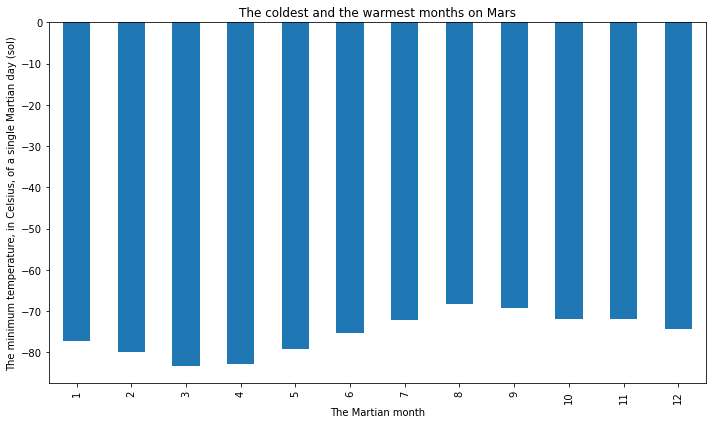

In [41]:
#Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
Monthmean=Web.groupby('month').mean()['min_temp']

Monthmean.plot(kind="bar",figsize=(10,6))


# Set the xlabel and ylabel using class methods
plt.xlabel("The Martian month")
plt.ylabel("The minimum temperature, in Celsius, of a single Martian day (sol)")
plt.title("The coldest and the warmest months on Mars")
plt.tight_layout()



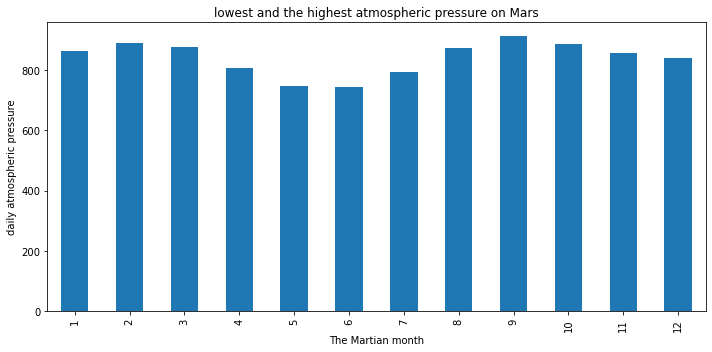

In [42]:
#Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
Monthmean=Web.groupby('month').mean()['pressure']

Monthmean.plot(kind="bar",figsize=(10,5))


# Set the xlabel and ylabel using class methods
plt.xlabel("The Martian month")
plt.ylabel("daily atmospheric pressure")
plt.title("lowest and the highest atmospheric pressure on Mars")
plt.tight_layout()

In [43]:
#Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

Date_asc=Web.sort_values(by='terrestrial_date', ascending=[False])
Mar_year = Date_asc[['terrestrial_date','month','min_temp']]
temp_asc=Web.sort_values(by='min_temp', ascending=[False])
temp_asc

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1582,1614,2017-05-10,1692,2,1,-62.0,820.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
138,60,2013-01-09,152,241,9,-63.0,914.0
129,50,2012-12-31,143,235,8,-63.0,908.0
95,12,2012-11-26,109,213,8,-64.0,844.0
...,...,...,...,...,...,...,...
1139,1166,2016-01-26,1234,99,4,-88.0,824.0
1142,1169,2016-01-29,1237,101,4,-88.0,820.0
1144,1168,2016-01-31,1239,102,4,-89.0,818.0
1074,1100,2015-11-20,1169,70,3,-89.0,894.0


In [44]:
days = pd.DataFrame(temp_asc['terrestrial_date'].diff())
days

,terrestrial_date
1582,NaT
926,-690 days
138,-892 days
129,-9 days
95,-35 days
...,...
1139,2 days
1142,3 days
1144,2 days
1074,-72 days


In [45]:
daydiff = days.dropna()
daydiff['terrestrial_date'] = daydiff['terrestrial_date'] / pd.Timedelta(days=1)
daydiff.terrestrial_date.dtype

C:\Users\Leyang Zhang\AppData\Local\Temp\ipykernel_13432\2568066912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daydiff['terrestrial_date'] = daydiff['terrestrial_date'] / pd.Timedelta(days=1)


dtype('float64')

In [46]:
Year = daydiff[(daydiff["terrestrial_date"] >= 365)]
Year

,terrestrial_date
716,650.0
774,770.0
1292,559.0
1384,1404.0
1367,1389.0
...,...
1145,734.0
1740,1337.0
1147,761.0
1129,711.0


In [47]:
Year.plot(kind="bar",figsize=(100,5))


# Set the xlabel and ylabel using class methods
plt.xlabel("days difference")
plt.ylabel("estimate days")
plt.title("how many days in on mars year")
plt.tight_layout()

In [ ]:
print(Year['terrestrial_date'].mean())
print(Year['terrestrial_date'].median())
print(Year['terrestrial_date'].mode())

838.4193548387096
717.0
0    628.0
1    668.0
2    687.0
3    711.0
Name: terrestrial_date, dtype: float64


In [ ]:
#Export the DataFrame to a CSV file
Marsweather.to_csv('Marsweather.csv', encoding='utf-8')